# Demo: Unsupervised Learning

Clustering customer spending data

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importing Dataset

In [ ]:
url = "https://raw.githubusercontent.com/rugvedmhatre/NYU-ML-2024-Session-1/main/day8/customer_spending_data.csv"

df = pd.read_csv(url)

df.head()

,Annual Income,Spending Score
0,57450.712295,87.737307
1,47926.035482,74.076862
2,59715.328072,69.701574
3,72845.447846,70.248408
4,46487.699379,35.949115


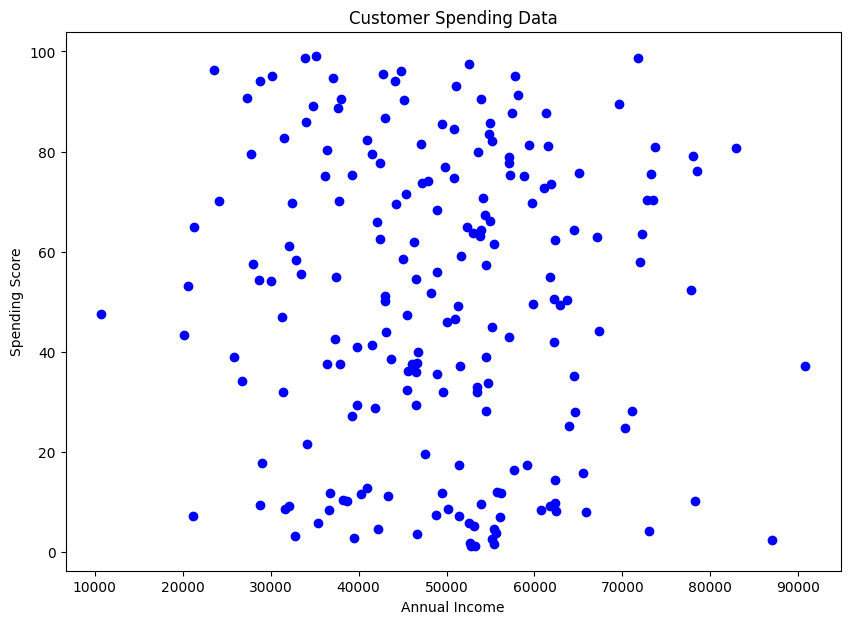

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income'], df['Spending Score'], c='blue', marker='o')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Spending Data')

plt.show()

## Preprocessing Dataset

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

## Determining Optimal Clusters

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

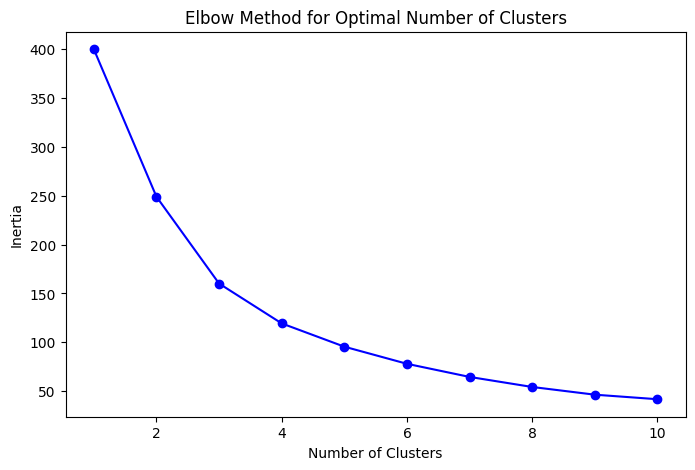

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

## Choosing 3 Clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Clusters

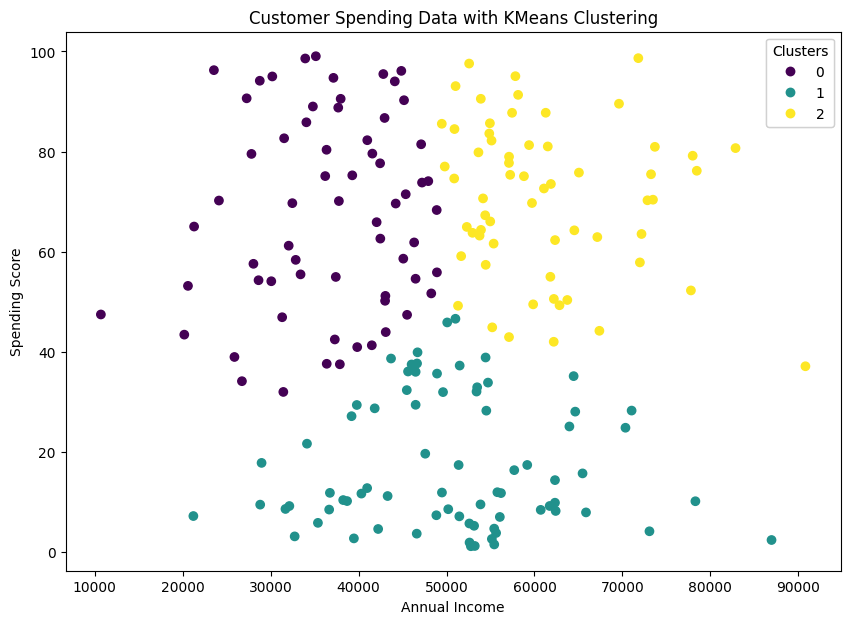

In [ ]:
df['Cluster'] = cluster_labels

# Plot the clustered data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis', marker='o')

# Labels and title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Spending Data with KMeans Clustering')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()